### Project 1 - 불량을 야기하는 변수를 찾고 불량품을 낮추기 위한 분석 진행
- 타겟 변수: 불량여부를 나타내는 이진데이터
- 설명 변수: 변수에 대한 설명이 없는 비식별화된 20개의 변수

In [21]:
# 필요한 라이브러리 불러오기 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.metrics import classification_report, confusion_matrix, roc_curve 
from imblearn.under_sampling import *
from imblearn.over_sampling import *


In [22]:
# 데이터 불러오기 
defect = pd.read_csv("./defect.csv")
defect.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,...,0.682731,0.249262,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,...,0.680891,0.249262,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,...,0.685525,0.249262,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,...,0.677980,0.249262,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,...,0.673286,0.249262,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


In [23]:
defect.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
count,527000.000000,527000.000000,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,...,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000
mean,0.375129,0.003963,0.455679,1.534800e-02,0.638446,0.037449,0.348374,0.025152,0.602939,0.299989,...,0.680077,2.492619e-01,0.601662,0.603826,0.247010,0.559367,0.025152,0.680077,0.037449,0.108159
std,0.200043,0.004316,0.105150,2.081670e-17,0.139334,0.016994,0.028971,0.003820,0.071272,0.033502,...,0.005244,1.387780e-16,0.065753,0.165551,0.030353,0.013077,0.003820,0.005244,0.016994,0.310582
min,0.000000,0.000000,0.000000,1.534800e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.492619e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204692,0.002366,0.415990,1.534800e-02,0.688810,0.026023,0.344457,0.024164,0.562785,0.295929,...,0.676136,2.492619e-01,0.562785,0.623615,0.243377,0.556788,0.024164,0.676136,0.026023,0.000000
50%,0.399744,0.003523,0.435739,1.534800e-02,0.693147,0.034280,0.345721,0.025805,0.624154,0.296921,...,0.680586,2.492619e-01,0.612178,0.645785,0.244290,0.557708,0.025805,0.680586,0.034280,0.000000
75%,0.545196,0.005094,0.530429,1.534800e-02,0.693147,0.048085,0.346949,0.028069,0.659246,0.297723,...,0.684354,2.492619e-01,0.647685,0.668555,0.245254,0.559589,0.028069,0.684354,0.048085,0.000000
max,0.693147,0.693147,0.693147,1.534800e-02,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.693147,2.492619e-01,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000


In [24]:
defect.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'Y'],
      dtype='object')

In [56]:
defect.shape

(527000, 21)

In [25]:
# null 값 확인
defect.isnull().sum().max()

0

In [26]:
print('Defect',round(defect['Y'].value_counts()[1]/len(defect) * 100,2), '% of the dataset')

Defect 10.82 % of the dataset


C:\Users\User\AppData\Local\Temp\ipykernel_11000\77127667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Y', data = defect, palette = colors)


<Axes: xlabel='Y', ylabel='count'>

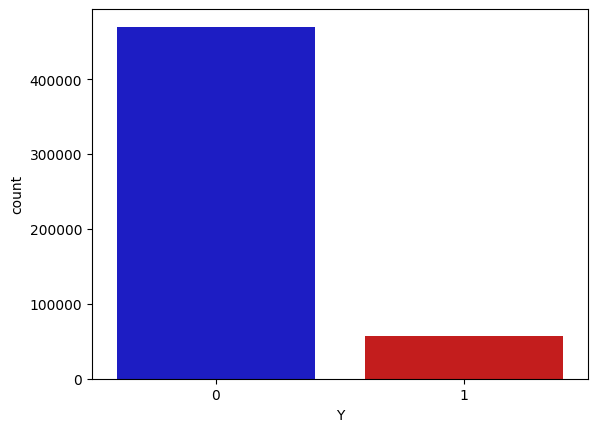

In [27]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x = 'Y', data = defect, palette = colors)

타겟변수에 대한 countplot과 defect 데이터의 비율을 따져봤을 때, 불균형한 데이터임을 알 수 있다.

C:\Users\User\AppData\Local\Temp\ipykernel_11000\873214649.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defect[column], shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11000\873214649.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defect[column], shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11000\873214649.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(defect[column], shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11000\873214649.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

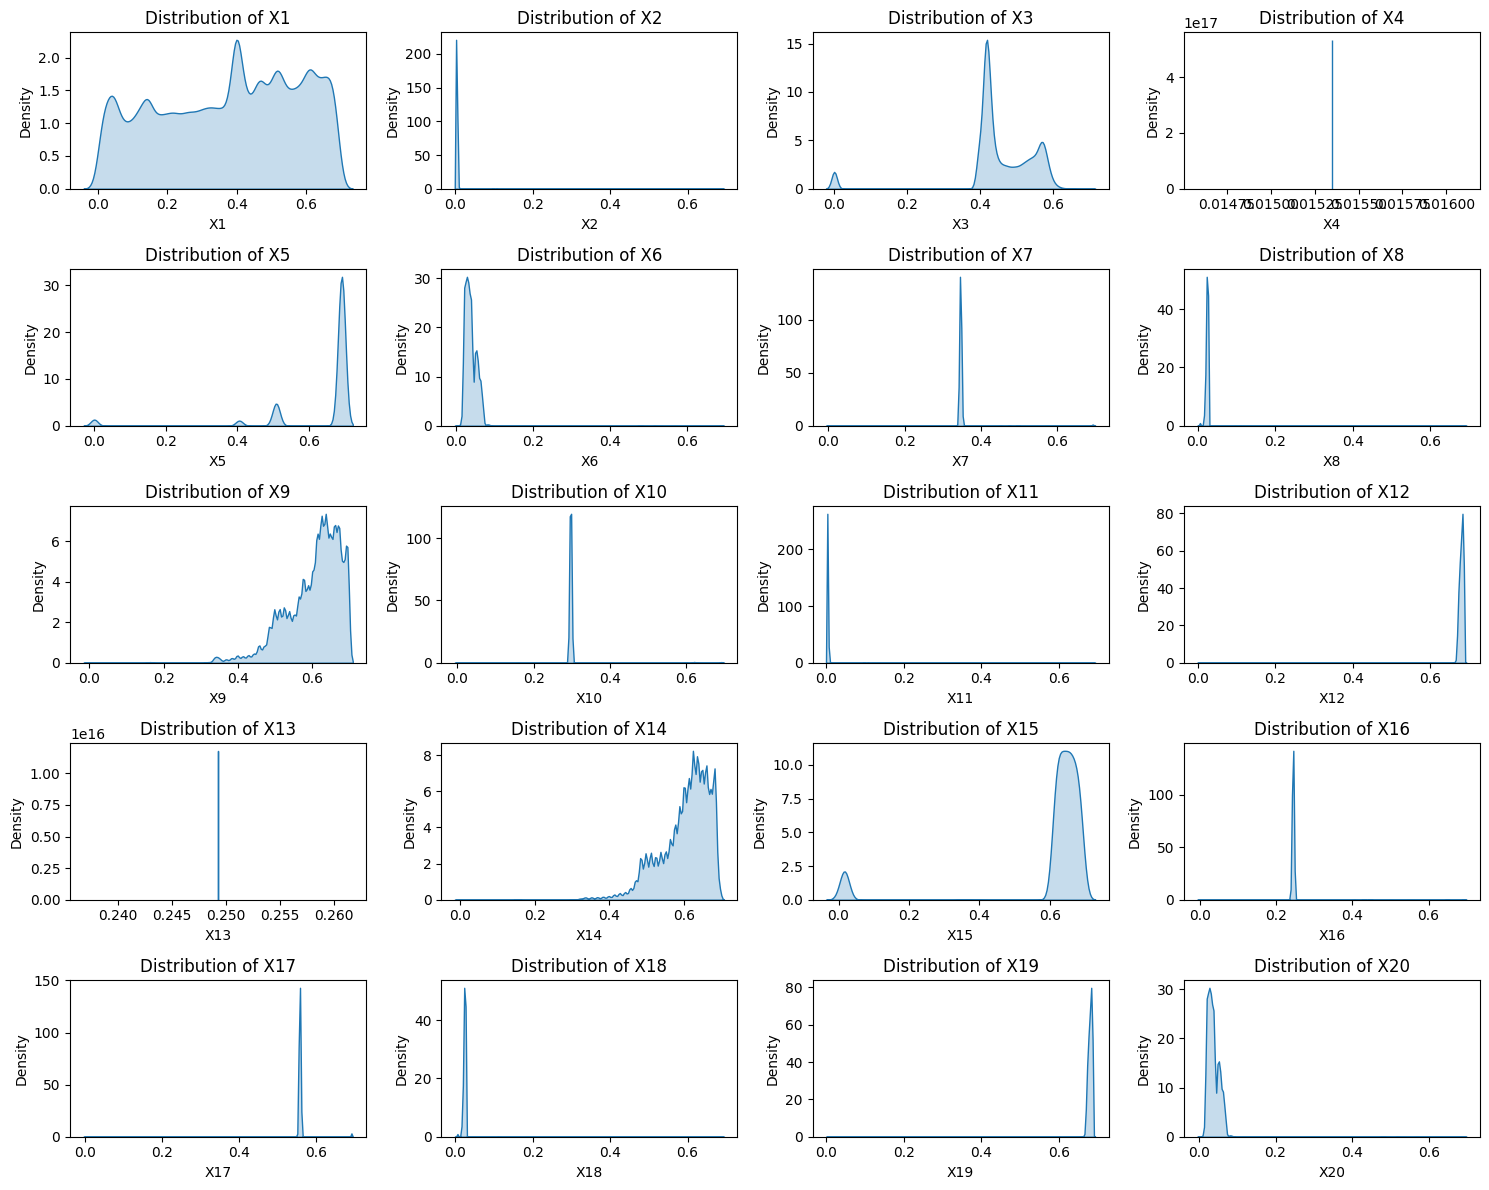

In [28]:
# KDE plot을 통해 각 변수의 분포 시각화
plt.figure(figsize=(15, 12))
for i, column in enumerate(defect.iloc[:, :-1]):  # 마지막 열 Y는 제외하고 X 변수만 사용
    plt.subplot(5, 4, i+1)
    sns.kdeplot(defect[column], shade=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


In [29]:
defect_X = defect.drop('Y', axis = 1)
defect_y = defect['Y']
defect_X.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
X1,1.000000,0.007232,0.013173,NaN,-0.004800,0.020829,0.042191,0.012175,-0.088833,0.031044,-0.002123,-0.051532,NaN,-0.073749,-0.029015,0.026393,0.037008,0.012175,-0.051532,0.020829
X2,0.007232,1.000000,-0.001012,NaN,-0.032625,0.340155,0.039338,0.145483,-0.198944,0.030899,0.253008,-0.134583,NaN,-0.211325,0.036906,0.049428,0.043113,0.145483,-0.134583,0.340155
X3,0.013173,-0.001012,1.000000,NaN,0.670508,0.050037,-0.065134,0.287924,0.157079,-0.064809,-0.024815,-0.000832,NaN,0.168482,-0.003778,-0.059671,-0.044357,0.287924,-0.000832,0.050037
X4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,-0.004800,-0.032625,0.670508,NaN,1.000000,-0.026790,-0.015887,0.378455,0.306740,-0.000004,-0.041576,0.226740,NaN,0.301925,-0.052146,-0.013528,0.006401,0.378455,0.226740,-0.026790
X6,0.020829,0.340155,0.050037,NaN,-0.026790,1.000000,0.057066,0.328973,-0.385757,0.039044,0.250940,-0.290731,NaN,-0.407812,0.063711,0.076880,0.066468,0.328973,-0.290731,1.000000
X7,0.042191,0.039338,-0.065134,NaN,-0.015887,0.057066,1.000000,-0.016945,-0.118575,0.952678,0.041972,-0.005691,NaN,-0.141403,0.038803,0.935487,0.937973,-0.016945,-0.005691,0.057066
X8,0.012175,0.145483,0.287924,NaN,0.378455,0.328973,-0.016945,1.000000,0.274797,0.005087,0.102776,-0.120333,NaN,0.252883,-0.106226,0.000351,0.007589,1.000000,-0.120333,0.328973
X9,-0.088833,-0.198944,0.157079,NaN,0.306740,-0.385757,-0.118575,0.274797,1.000000,-0.070339,-0.142405,0.259801,NaN,0.973964,-0.265122,-0.124379,-0.118145,0.274797,0.259801,-0.385757
X10,0.031044,0.030899,-0.064809,NaN,-0.000004,0.039044,0.952678,0.005087,-0.070339,1.000000,0.037264,0.015780,NaN,-0.092318,0.029965,0.948637,0.980545,0.005087,0.015780,0.039044


<Axes: >

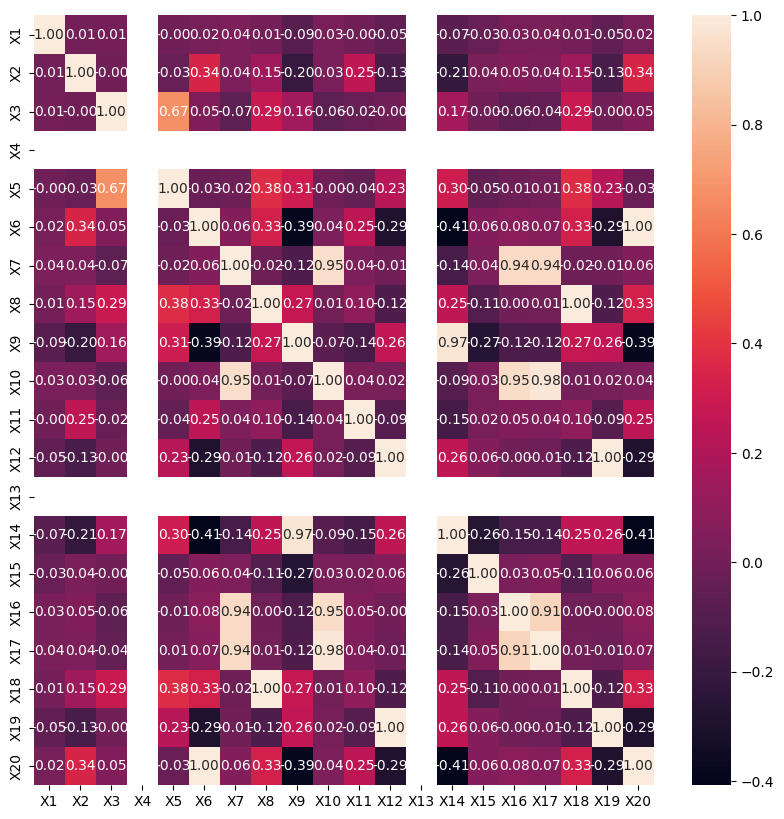

In [30]:
#Y 포함한 모든 칼럼 상관계수 히트맵
plt.figure(figsize=(10,10))
sns.heatmap(defect_X.corr(),annot=True,fmt=".2f")

In [31]:
## 
print((defect_X["X6"]-defect_X["X20"]).unique())
print((defect_X["X8"]-defect_X["X18"]).unique())
print((defect_X["X12"]-defect_X["X19"]).unique())

[0.]
[0.]
[0.]


- 동일 칼럼
    X6 == X20
    X8 == X18
    X12 == X19

In [32]:
print(defect_X['X4'].unique())
print(defect_X['X13'].unique())

[0.015348]
[0.2492619]


- 단일값을 가진 컬럼
    x4, x13

**x4, x13, x18, x19, x20 드롭**

In [33]:
defect_X_dropped = defect_X.drop(['X20', 'X18', 'X19', 'X4', 'X13'], axis= 1)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    defect_X_dropped.values, i) for i in range(defect_X_dropped.shape[1])]
vif["features"] = defect_X_dropped.columns
vif

,VIF Factor,features
0,4.608706,X1
1,2.183903,X2
2,38.570471,X3
3,48.205489,X5
4,9.985000,X6
5,1835.454304,X7
6,73.145095,X8
7,1489.955096,X9
8,2305.708857,X10
9,1.845529,X11


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(defect_X_dropped, defect_y, test_size=0.3, stratify=defect_y, random_state=10000)

# 결과 출력 (훈련 데이터에서 클래스 비율 확인)
print("훈련 데이터에서 클래스 분포:\n", y_train.value_counts(normalize=True))
print("테스트 데이터에서 클래스 분포:\n", y_test.value_counts(normalize=True))

# 개수
print(y_train[y_train==1].shape)
print(y_train[y_train==0].shape)

훈련 데이터에서 클래스 분포:
 Y
0    0.891841
1    0.108159
Name: proportion, dtype: float64
테스트 데이터에서 클래스 분포:
 Y
0    0.891841
1    0.108159
Name: proportion, dtype: float64
(39900,)
(329000,)


1.Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 로지스틱 회귀 모델 생성
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_lr = lr_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.9884


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    141000
           1       1.00      0.89      0.94     17100

    accuracy                           0.99    158100
   macro avg       0.99      0.95      0.97    158100
weighted avg       0.99      0.99      0.99    158100



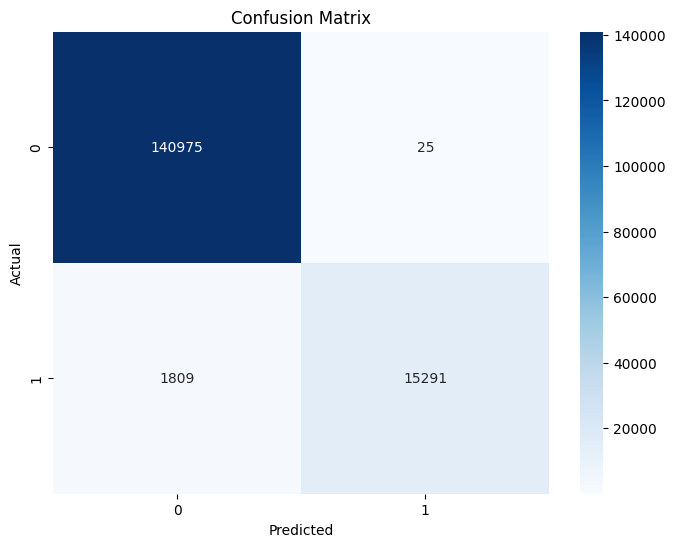

In [52]:
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
#f1_score
from sklearn.metrics import f1_score

# 데이터 스플릿으로 y_valid와 모델 예측으로 y_pred를 구한 후 실행
# y_pred만 모델에 맞게 수정
f1 = f1_score(y_test, y_pred_lr)
print(f"f1_score: {round(f1,4)}")

# G-Mean
# y_pred만 모델에 맞게 수정
from imblearn.metrics import geometric_mean_score
g_mean = geometric_mean_score(y_test, y_pred_lr) # 예측값, 실제값
print(f"G-Mean: {round(g_mean,4)}")

f1_score: 0.9434
G-Mean: 0.9455


2.Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 랜덤포레스트 분류 모델 생성
rf_model = RandomForestClassifier(random_state=4)
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_rf = rf_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9997


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141000
           1       1.00      1.00      1.00     17100

    accuracy                           1.00    158100
   macro avg       1.00      1.00      1.00    158100
weighted avg       1.00      1.00      1.00    158100



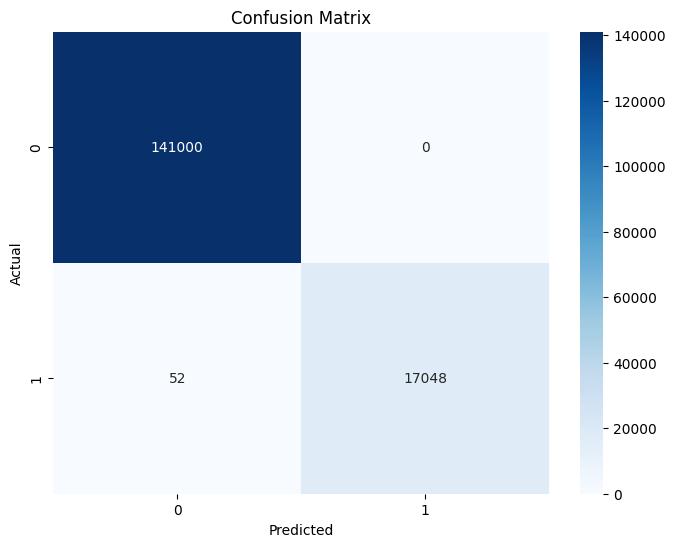

In [58]:
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [59]:
#f1_score
from sklearn.metrics import f1_score

# 데이터 스플릿으로 y_valid와 모델 예측으로 y_pred를 구한 후 실행
# y_pred만 모델에 맞게 수정
f1 = f1_score(y_test, y_pred_rf)
print(f"f1_score: {round(f1,4)}")

# G-Mean
# y_pred만 모델에 맞게 수정
from imblearn.metrics import geometric_mean_score
g_mean = geometric_mean_score(y_test, y_pred_rf) # 예측값, 실제값
print(f"G-Mean: {round(g_mean,4)}")

f1_score: 0.9985
G-Mean: 0.9985


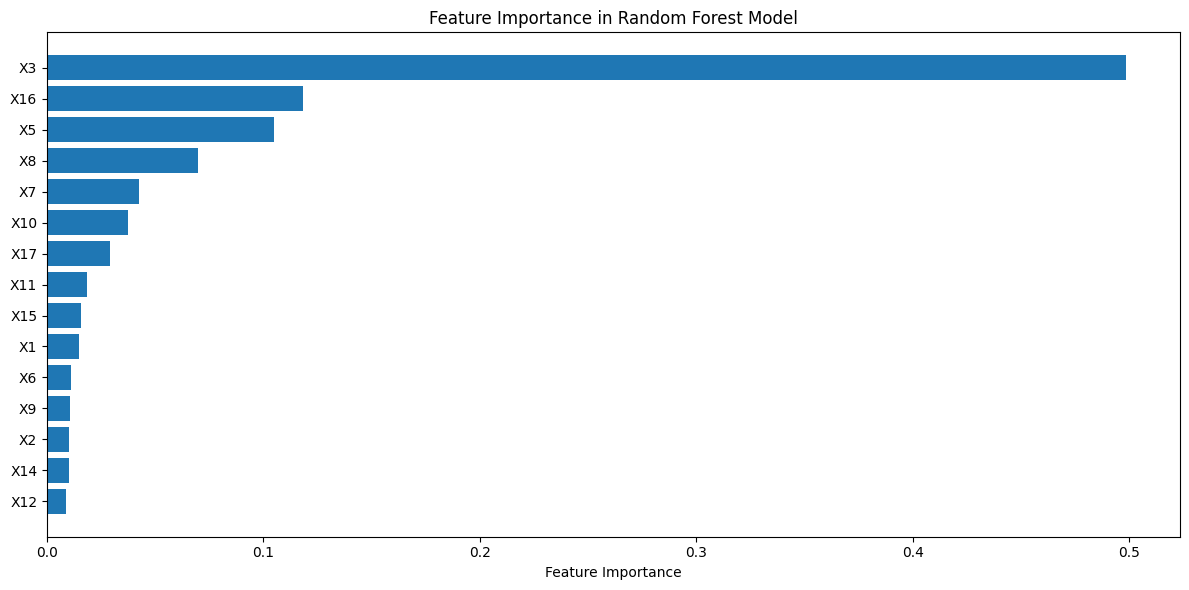

In [68]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

3.XGBoost

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# XGBoost 분류 모델 생성
xgb_model = XGBClassifier(random_state=4)
xgb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_xgb = xgb_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9996


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141000
           1       1.00      1.00      1.00     17100

    accuracy                           1.00    158100
   macro avg       1.00      1.00      1.00    158100
weighted avg       1.00      1.00      1.00    158100



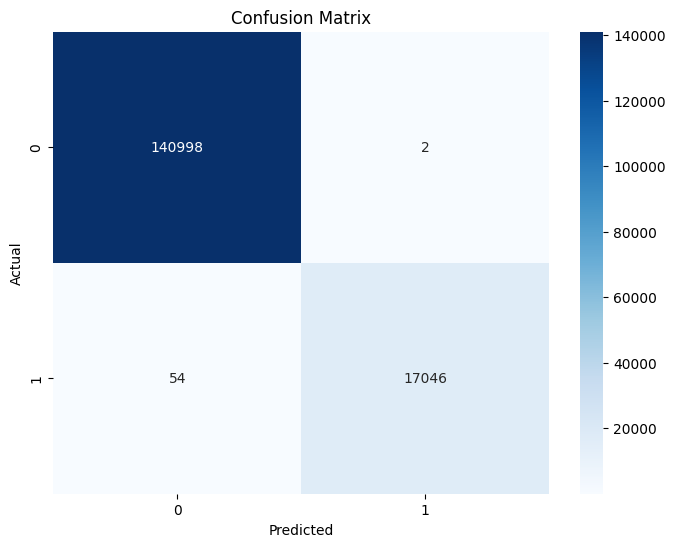

In [61]:
print(classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [62]:
#f1_score
from sklearn.metrics import f1_score

# 데이터 스플릿으로 y_valid와 모델 예측으로 y_pred를 구한 후 실행
# y_pred만 모델에 맞게 수정
f1 = f1_score(y_test, y_pred_xgb)
print(f"f1_score: {round(f1,4)}")

# G-Mean
# y_pred만 모델에 맞게 수정
from imblearn.metrics import geometric_mean_score
g_mean = geometric_mean_score(y_test, y_pred_xgb) # 예측값, 실제값
print(f"G-Mean: {round(g_mean,4)}")

f1_score: 0.9984
G-Mean: 0.9984


4.Light GBM

In [63]:
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# LightGBM 분류 모델 생성
lgbm_model = LGBMClassifier(random_state=4)
lgbm_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred_lgbm = lgbm_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 39900, number of negative: 329000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3152
[LightGBM] [Info] Number of data points in the train set: 368900, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.108159 -> initscore=-2.109681
[LightGBM] [Info] Start training from score -2.109681
Accuracy: 0.9989


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141000
           1       0.99      1.00      0.99     17100

    accuracy                           1.00    158100
   macro avg       1.00      1.00      1.00    158100
weighted avg       1.00      1.00      1.00    158100



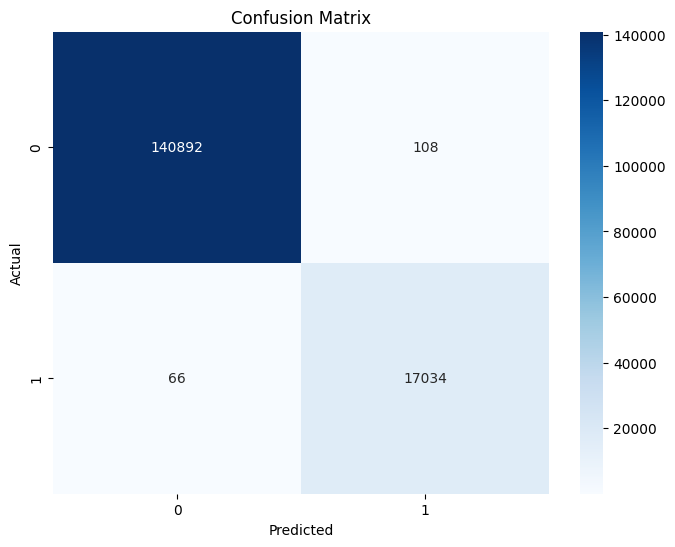

In [64]:
print(classification_report(y_test, y_pred_lgbm))
cm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [65]:
#f1_score
from sklearn.metrics import f1_score

# 데이터 스플릿으로 y_valid와 모델 예측으로 y_pred를 구한 후 실행
# y_pred만 모델에 맞게 수정
f1 = f1_score(y_test, y_pred_lgbm)
print(f"f1_score: {round(f1,4)}")

# G-Mean
# y_pred만 모델에 맞게 수정
from imblearn.metrics import geometric_mean_score
g_mean = geometric_mean_score(y_test, y_pred_lgbm) # 예측값, 실제값
print(f"G-Mean: {round(g_mean,4)}")

f1_score: 0.9949
G-Mean: 0.9977
